# **Chapter 5 트리 알고리즘**

## 05-1 결정 트리

### 1) 로지스틱 회귀로 와인 분류하기

5장에서는 생선대신 와인 데이터를 가지고 (의사)결정 트리와 앙상블 모델을 공부한다.

<u>트리 모델은 분류와 회귀에 모두 이용</u>할 수 있으며, 분석 결과를 해석하고 설명하기 쉽기 때문에 널리 쓰인다.

#### a) wine 데이터 준비

알콜 도수, 당도, pH값으로 화이트, 레드 와인을 분류해보자.

아래 결과에서 **`class`변수가 와인 종류를 나타내는데 0은 레드와인, 1은 화이트와인을 나타낸다.**

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,6497.0,10.491801,1.192712,8.00,9.50,10.30,11.30,14.90
sugar,6497.0,5.443235,4.757804,0.60,1.80,3.00,8.10,65.80
pH,6497.0,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
class,6497.0,0.753886,0.430779,0.00,1.00,1.00,1.00,1.00


In [11]:
pd.value_counts(wine['class'])

<ipython-input-11-ea89a4035100>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(wine['class'])


,count
class,
1.0,4898
0.0,1599


#### b) pandas DataFrame 복습

* 데이터프레임은 행과 열로 이루어진 2차원 행렬인데 행보다는 열이 중요하다. (* 퀴즈 : 이유는?)

  데이터프레임에 들어있는 컬럼들에 대한 기본 정보를 알아보려면 `shape, info, describe` 등을 이용.

* 범주형 변수 컬럼의 빈도를 보려면

In [33]:
pd.value_counts(wine['class'])

<ipython-input-33-ea89a4035100>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(wine['class'])


,count
class,
1.0,4898
0.0,1599


In [32]:
import numpy as np

np.bincount(wine['class'])

array([1599, 4898])

#### c) 로지스틱 회귀를 이용한 와인 분류

4장에서 공부한 로지스틱 회귀 모델을 이용해서 분류해보자.

1) 데이터 준비



In [43]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [74]:
data=wine.iloc[:,0:3].to_numpy()
target=wine.iloc[:,3].to_numpy()

In [75]:
print(data,target)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]] [0. 0. 0. ... 1. 1. 1.]


2) 데이터 분할

In [82]:
from sklearn.model_selection import train_test_split

train,test,target1,target2=train_test_split(data,target,random_state=0,stratify=target)

print(train.shape,test.shape)

(4872, 3) (1625, 3)


3) 데이터 표준화

In [81]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
strain=ss.fit_transform(train)
stest=ss.transform(test)

4) 로지스틱 회귀 모델 훈련

In [84]:
from sklearn.linear_model import LogisticRegression

m=LogisticRegression()
m.fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.7822249589490968
0.776


결과가 좋지 못하다. 규제 매개변수 C를 바꿔보거나 `solver = `옵션을 이용해서 다른 알고리즘으로 모델을 새로 만들어볼 수도 있겠다.(197쪽 참조)

#### d) 설명하기 쉬운 모델과 어려운 모델

위에서 만든 로지스틱 회귀 모델의 계수들은 다음과 같다.

In [85]:
print(m.coef_, m.intercept_)

[[ 0.5049101   1.74608912 -0.71465494]] [1.85672357]


이 결과를 가지고 교재 225쪽과 같이 보고서를 만들었다고 해보자.

    1) 먼저 보고서 내용을 잘 읽어보자. 왜 곱하고 더하고 곱하고... 그렇게 계산한 결과가 0보다 크면 화이트와인으로 분류하는가?
    2) 이런 보고서를 받은 사람(이사님!)은 어떤 반응을 보일까?
    3) 머신러닝 학습 결과를 설명하기 어려운 것이 로지스틱 회귀 모델만의 문제일까?


### 2) 결정 트리

스무 고개 - 데이터에 질문(조건문)을 적용했을 때, 맞으면(True) 왼쪽으로, 틀리면(False) 오른쪽으로.

#### a) 결정트리 분류

In [98]:
from sklearn.tree import DecisionTreeClassifier

m=DecisionTreeClassifier(random_state=0)
m.fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.9971264367816092
0.8498461538461538


과대적합.

#### b) 트리 그림

 모델을 개선하기 전에 일단 트리 그림부터 그려보자.

 파이썬의 `matplotlib.pyplot`과 사이킷런의 `tree` 모듈에 들어있는 함수 `plot_tree`가 필요하다.

트리를 간단히 만들어야할 것 같다.

먼저 228쪽의 'root node, leaf node'라는 용어 설명을 읽어보자.

* root node, leaf node

결정 트리의 모양은 우리가 알고 있는 나무를 거꾸로 세운 것과 같다. 또는 물에 비친 나무의 그림자를 생각해도 좋겠다.

나무의 경우 뿌리가 가장 아래에 있고 줄기와 잎이 그 위에 달려있지만 결정 트리에서는 맨 위에 있는 '노드 (node)'가 출발점 즉 뿌리노드(root node)가 된다.

먼저 모든 데이터가 다 들어있는 뿌리노드에서 적절한 조건을 만족시키는가 여부에 따라 데이터를 둘로 나눈다. 그런 과정을 거듭하다가 더 이상 가지를 나누지 않는 맨 아래편 마지막 노드들에서 끝난다. 그 노드를 나뭇잎, 즉 '리프 노드(leaf node)'라고 부른다.



결정 트리는 변수 가운데 가장 중요한 변수를 하나 골라 그 변수의 값에 따라 데이터를 둘로 나누는 작업을 반복한다(큰 문제를 작은 문제로 나누어 해결하는 이런 알고리즘을 '분할 정복(divide and conquer)'알고리즘이라고도 부른다).

위의 나무는 너무 가지를 많이 뻗어서 복잡하므로 아주 간단하게 만들어보자. 먼저 루트 노드부터 나무의 깊이를 1로 정해서(`max_depth = 1`) 다시 그려보자. `filled=` 옵션은 노드 내부를 색칠하기 위한 것이다.

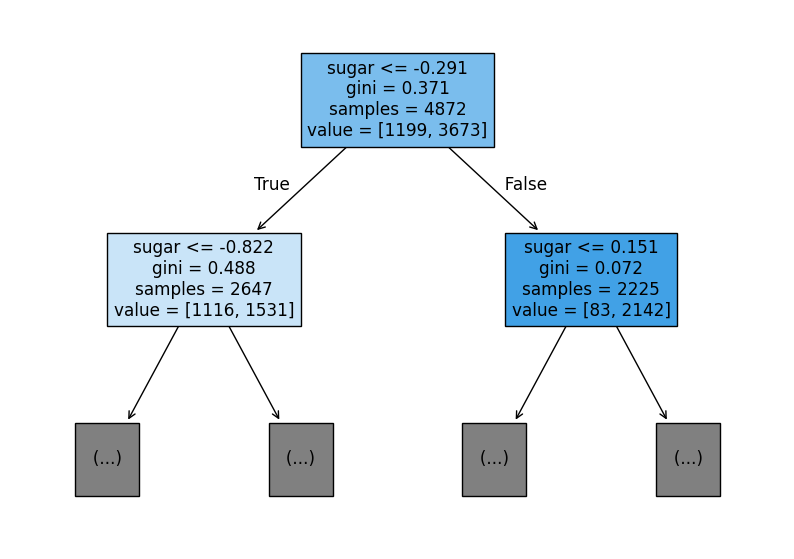

In [100]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(m, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

* 퀴즈 : 첫번째 노드 분할 결과로 나오는 두 노드의 샘플 수 2647개, 2225개를 코드로 설명하시오.

In [94]:
sum(strain[:,1] <= -0.291)

2647

In [95]:
sum(strain[:,1] > -0.291)

2225

#### c) Gini 불순도와 정보 이득

**참고 :**
gini 대신 entropy를 기준으로 하려면 DecisionTreeClassifier 객체를 만들 때  `criterion= 'entropy'`라고 지정하면 된다.

In [101]:
from sklearn.tree import DecisionTreeClassifier

m2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
m2.fit(strain, target1)

print(m2.score(strain, target1))
print(m2.score(stest, target2))

0.9971264367816092
0.8498461538461538


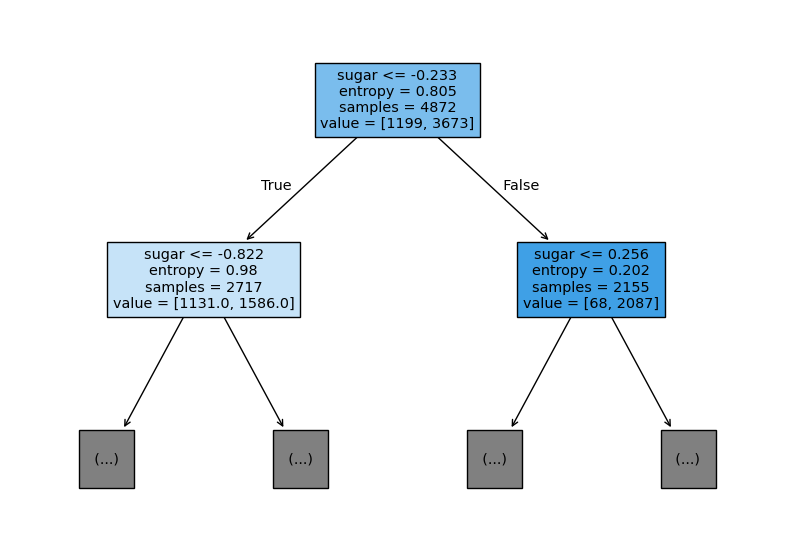

In [102]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(m2, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#### d) 가지치기

나무가 너무 복잡해지는 것을 막는 방법은 `DecisionTreeClassifier()`의 객체를 만들 때 `max_depth`를 작은 값으로 지정하는 것이다(물론 다른 방법도 있다. 가령 `min_samples_split`을 이용하는 방법 등).

In [119]:
from sklearn.tree import DecisionTreeClassifier

m=DecisionTreeClassifier(random_state=0,max_depth=3)
m.fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.8464696223316913
0.8473846153846154


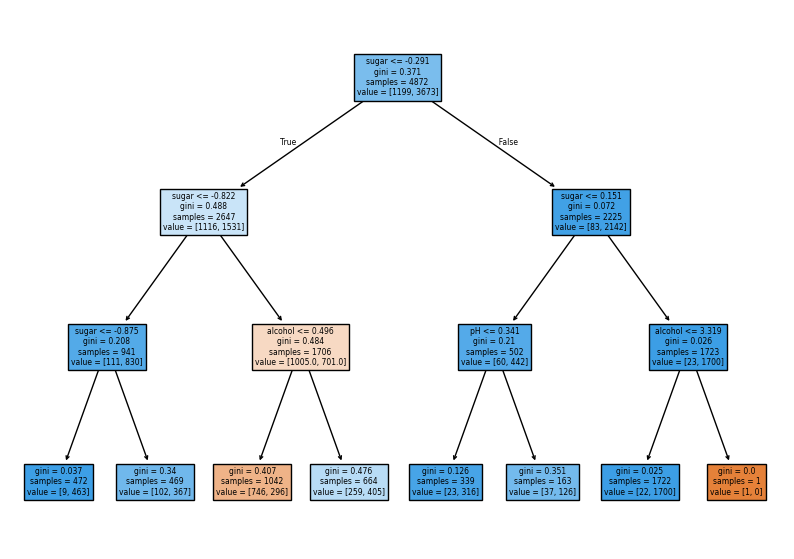

In [120]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(m, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

지금까지는 표준화한 feature 데이터로 트리 모델을 만들어 와인을 분류했다. 이번에는 표준화하지 않은 데이터로 같은 작업을 해보자.

In [121]:
from sklearn.tree import DecisionTreeClassifier

m=DecisionTreeClassifier(random_state=0,max_depth=3)
m.fit(train,target1)

print(m.score(train,target1))
print(m.score(test,target2))

0.8464696223316913
0.8473846153846154


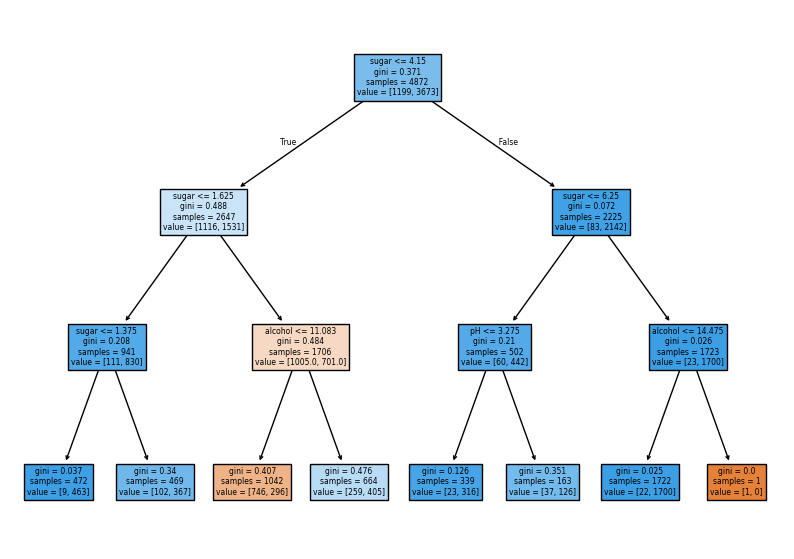

In [122]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(m, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

성능은 아무 것도 달라지지 않았고 도리어 표준화하지 않았을 때 해석하기가 더 낫다.

(표준화한 데이터로 만든 트리의 루트노드를 보라.

당도가 음수? "이사님에게" 설명하기 어려워진다).

마지막으로 세 feature 변수들로 와인을 분류하였는데 세 변수의 역할이 서로 다를 것이다. 아래와 같이 `feature_importances_` 속성을 출력해서 각 변수의 중요도를 비교할 수 있다. 알콜, 당도, pH 순서이므로 당도의 중요도가 가장 높은 것을 알 수 있다.

In [127]:
m.feature_importances_

array([0.11787374, 0.87466455, 0.00746172])



  코드에 있는 `min_impurity_decrease=`는 <u>정보이득이 정해준 값보다 작으면 더 이상 가지를 나누지 않도록 만드는 매개변수로서 기본값은 0이다</u> ([사이킷런 도움말](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) 참조).

In [150]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.005, random_state=0)
dt.fit(train, target1)

print(dt.score(train, target1))
print(dt.score(test, target2))

0.8630952380952381
0.848


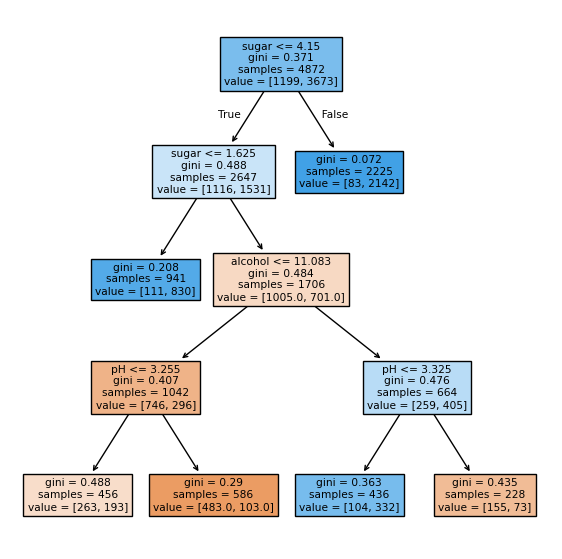

In [151]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(7, 7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

depth가 4까지이지만 나무의 모양이 더이상 좌우대칭이 아니다. `min_impurity_decrease` 값을 0.005로 두었을 때의 결과를 `max_depth = 4`를 이용한 아래 모델과 비교해보라. 정확도는 서로 비슷해보인다. 그렇다면 어느 쪽이 더 나아보이는가?

In [130]:
dt4 = DecisionTreeClassifier(max_depth = 4, random_state=0)
dt4.fit(train, target1)

print(dt4.score(train, target1))
print(dt4.score(test, target2))

0.8637110016420362
0.8486153846153847


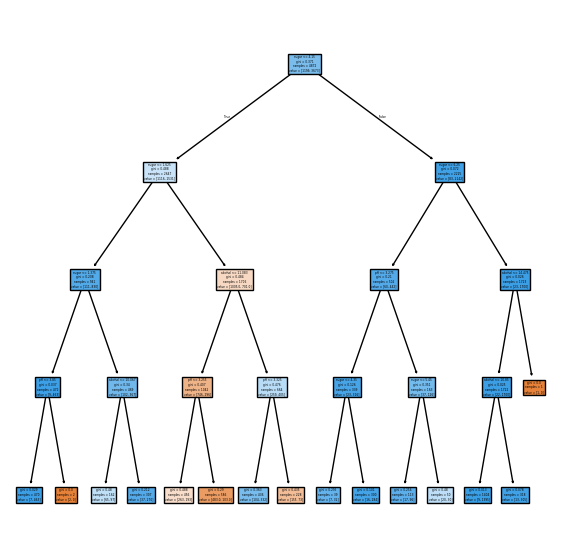

In [154]:
plt.figure(figsize=(7,7))
plot_tree(dt4, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

* 퀴즈 : `min_impurity_decrease` 값을 0.05, 0.001로 바꾸면 결과가 어떻게 달라지는가? score 값과 트리 그림을 비교해보라.  `min_impurity_decrease` 값을 큰 값으로 정하면 트리가 단순해질까, 복잡해질까?

In [152]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=0)
dt.fit(train, target1)

print(dt.score(train, target1))
print(dt.score(test, target2))

0.8788998357963875
0.8566153846153847


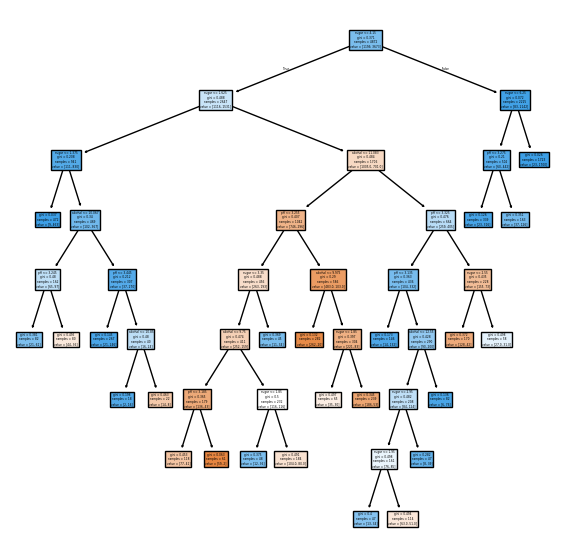

In [153]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(7, 7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

* 참고

  의사결정나무에서 선택할 수 있는 매개변수들(`max_depth`, `min_impurity_decrease`, `min_samples_split`, `min_samples_leaf`등)은 대개 과대적합, 즉 나무가 너무 복잡해지는 경우를 피하기 위해 이용한다. 문제는 <u>이러한 매개변수들이 여럿이고 서로 간섭하기 때문에 매개변수들의 최적값 조합을 찾는 작업이 단순하지 않다는 것이다.</u>

* 참고

  개별 데이터의 결정트리 분류 결과는 어떻게 알 수 있을까? `min_impurity_decrease = 0.005`인 나무모델과 `max_depth = 4`인 나무모델의 분류결과를 비교해보라.